<a href="https://colab.research.google.com/github/DDPSscipo/Civica_Netzero/blob/main/Descriptive_Analysis_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


2021

In [ ]:
tweets_2021 = pd.read_csv("data_2021_updated.csv")
tweets_2021.head()

# created a new date column in google sheets to extract just the D/M/Y from the Twitter imported date

,tweet_id,views_count,favorite_count,retweet_count,full_text,date,date-time\n,hashtags,user_id,user_followers_count,user_location,user_screen_name
0,1.443176e+18,NaN,20,12,Congratulations @DraxGroup for your outstandin...,9/29/2021,Wed Sep 29 11:29:57 +0000 2021,[],VXNlcjo0MjA2NTc4MTg=,1280,"Bristol, UK",BrisRisingTide
1,1.443175e+18,NaN,4,1,UK trade association for manufacturers and pro...,9/29/2021,Wed Sep 29 11:26:38 +0000 2021,[],VXNlcjoxODE5ODE5Nzg=,18455,NaN,ElectricalTimes
2,1.443171e+18,NaN,1,0,A new National #Electrification #Skills Framew...,9/29/2021,Wed Sep 29 11:08:03 +0000 2021,"['Electrification', 'Skills', 'LCV2021', 'EVs'...",VXNlcjoxMjg2MTM0OTUw,9678,United Kingdom,HVM_Catapult
3,1.443170e+18,NaN,5,1,Every Australian state and territory has commi...,9/29/2021,Wed Sep 29 11:05:40 +0000 2021,[],VXNlcjozMzE5OTg2OQ==,3019,"London, England",angeladewan
4,1.443168e+18,NaN,5,2,The UK has achieved a major technology breakth...,9/29/2021,Wed Sep 29 10:57:45 +0000 2021,"['cement', 'netzero', 'hydrogen']",VXNlcjo5MDM4NTY1OTA=,5968,UK,MineralProduct


In [ ]:
tweets_2021['favorite_count'] =

In [ ]:
summary_tweets_2021 = tweets_2021['date'].describe()
print(summary_tweets_2021)

count           8656
unique            89
top       10/19/2021
freq             538
Name: date, dtype: object


In [ ]:
from datetime import datetime

date_string = '2022-01-01'
date_object = datetime.strptime(date_string, '%Y-%m-%d')

dates_2021 = tweets_2021['date']

In [ ]:
tweets_2021['date'] = pd.to_datetime(tweets_2021['date'])

tweet_counts_2021 = tweets_2021.groupby('date').size()

print(tweet_counts_2021)

date
2021-09-01    53
2021-09-02    51
2021-09-03    58
2021-09-04    12
2021-09-05    14
              ..
2021-11-26    54
2021-11-27     8
2021-11-28    20
2021-11-29    43
2024-04-12    18
Length: 89, dtype: int64


In [ ]:
max_tweet_count_2021 = tweet_counts_2021.max()
print("Max tweet count", max_tweet_count_2021)

Max tweet count 538


In [ ]:
max_tweet_date_2021 = tweet_counts_2021.idxmax()
print("Date with max tweet count", max_tweet_date_2021)

Date with max tweet count 2021-10-19 00:00:00


In [ ]:
# looking for 2nd highest # tweets
sorted_counts_2021 = tweet_counts_2021.sort_values(ascending=False)
second_highest_index_2021 = sorted_counts_2021.index[1]
second_highest_date_2021 = second_highest_index_2021.date()
print("Date with the second highest number of tweets:", second_highest_date_2021)

Date with the second highest number of tweets: 2021-11-03


In [ ]:
tweet_counts_by_date = tweets_2021.groupby('date').size()
second_highest_date_2021 = tweet_counts_by_date.nlargest(2).index[1]
tweets_on_second_highest_date_2021 = tweet_counts_by_date[second_highest_date_2021]
print("Number of tweets on the second highest date:", tweets_on_second_highest_date_2021)

Number of tweets on the second highest date: 426


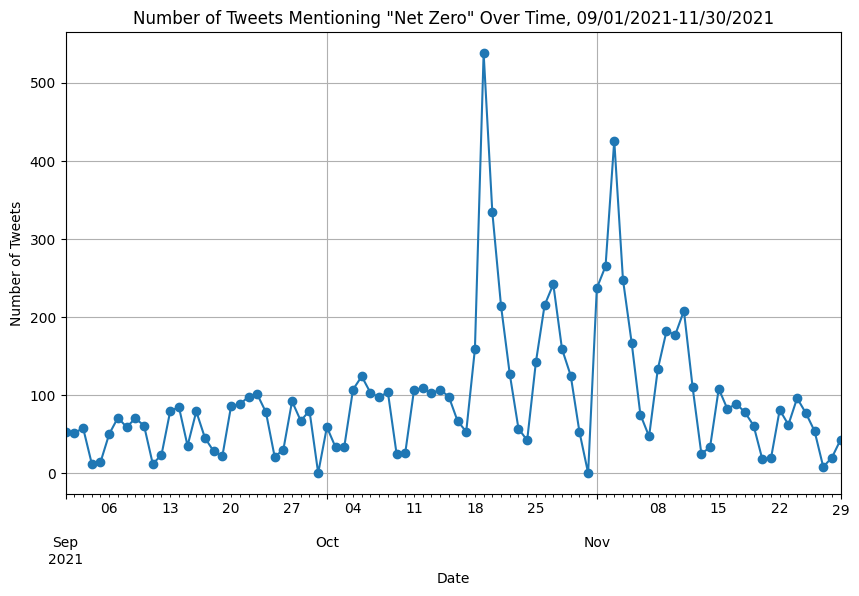

In [ ]:
# creating 2021 graph
tweets_2021['date'] = pd.to_datetime(tweets_2021['date'])
filtered_tweets_2021 = tweets_2021[(tweets_2021['date'] >= '2021-09-01') & (tweets_2021['date'] <= '2021-11-30')]
tweet_counts_2021 = filtered_tweets_2021.groupby(pd.Grouper(key='date', freq='D')).size()

plt.figure(figsize=(10, 6))
tweet_counts_2021.plot(kind='line', marker='o', linestyle='-')
plt.title('Number of Tweets Mentioning "Net Zero" Over Time, 09/01/2021-11/30/2021')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()


In [ ]:
# find dates without tweets -- this id'd an error with original data collection
start_date = pd.to_datetime('2021-09-01')
end_date = pd.to_datetime('2021-11-30')
all_dates = pd.date_range(start=start_date, end=end_date).date
tweet_dates = tweets_2021['date'].dt.date.unique()
dates_without_tweets = [date for date in all_dates if date not in tweet_dates]
print("Dates without any tweets:", dates_without_tweets)



Dates without any tweets: [datetime.date(2021, 9, 30), datetime.date(2021, 10, 31), datetime.date(2021, 11, 30)]


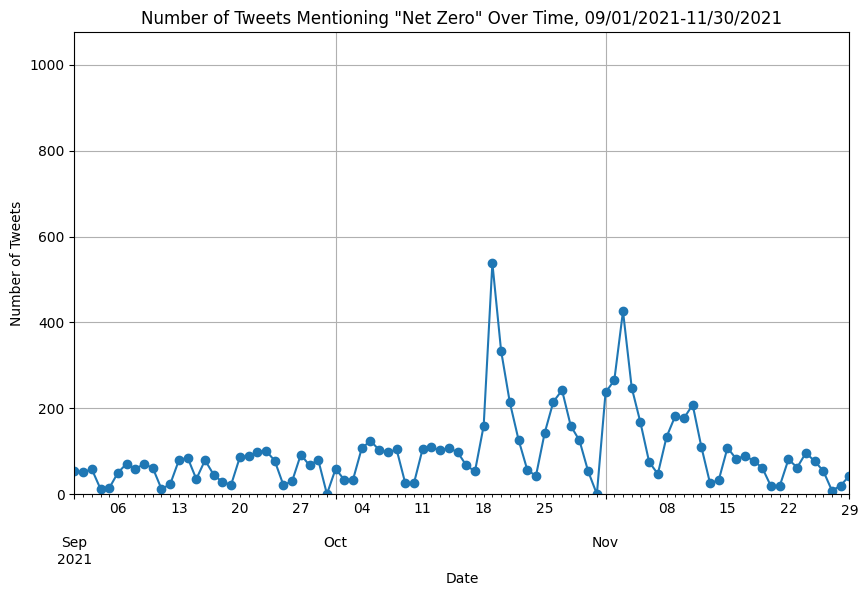

In [ ]:
# creating a graph with a larger y-axis
filtered_tweets_2021 = tweets_2021[(tweets_2021['date'] >= '2021-09-01') & (tweets_2021['date'] <= '2021-11-30')]
tweet_counts_2021 = filtered_tweets_2021.groupby(pd.Grouper(key='date', freq='D')).size()

plt.figure(figsize=(10, 6))
tweet_counts_2021.plot(kind='line', marker='o', linestyle='-')

plt.ylim(0, tweet_counts_2021.max() * 2)  # Expand the y-axis by 10%

plt.title('Number of Tweets Mentioning "Net Zero" Over Time, 09/01/2021-11/30/2021')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

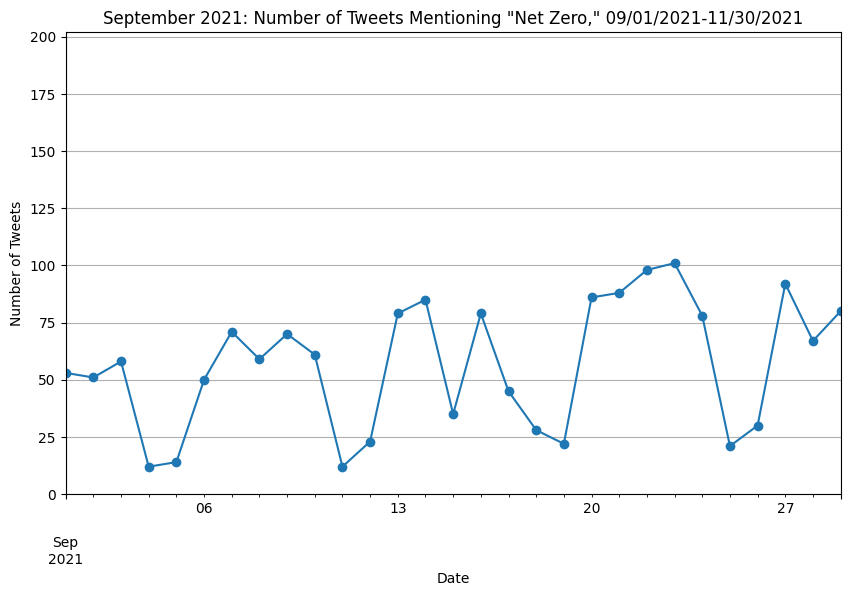

In [ ]:
# september 2021

filtered_tweets_2021 = tweets_2021[(tweets_2021['date'] >= '2021-09-01') & (tweets_2021['date'] <= '2021-09-30')]
tweet_counts_2021 = filtered_tweets_2021.groupby(pd.Grouper(key='date', freq='D')).size()

plt.figure(figsize=(10, 6))
tweet_counts_2021.plot(kind='line', marker='o', linestyle='-')

plt.ylim(0, tweet_counts_2021.max() * 2)

plt.title('September 2021: Number of Tweets Mentioning "Net Zero," 09/01/2021-11/30/2021')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

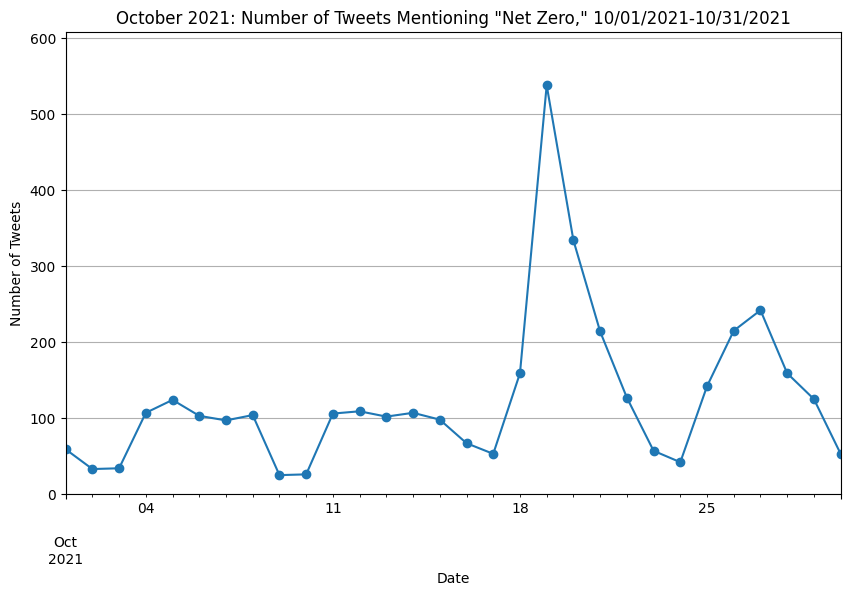

In [ ]:
# october 2021

filtered_tweets_2021 = tweets_2021[(tweets_2021['date'] >= '2021-10-01') & (tweets_2021['date'] <= '2021-10-31')]
tweet_counts_2021 = filtered_tweets_2021.groupby(pd.Grouper(key='date', freq='D')).size()

plt.figure(figsize=(10, 6))
tweet_counts_2021.plot(kind='line', marker='o', linestyle='-')

plt.ylim(0, tweet_counts_2021.max() * 1.13)

plt.title('October 2021: Number of Tweets Mentioning "Net Zero," 10/01/2021-10/31/2021')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

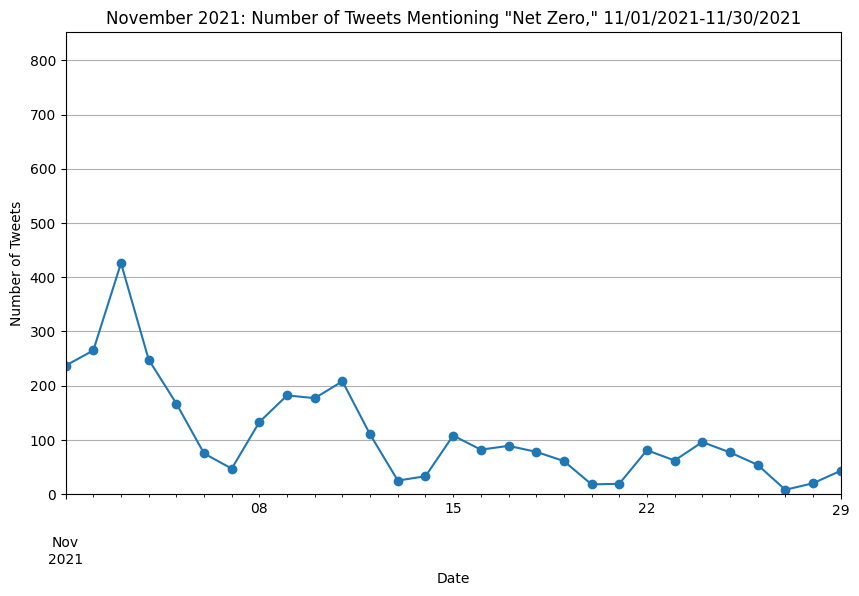

In [ ]:
# november 2021

filtered_tweets_2021 = tweets_2021[(tweets_2021['date'] >= '2021-11-01') & (tweets_2021['date'] <= '2021-11-30')]
tweet_counts_2021 = filtered_tweets_2021.groupby(pd.Grouper(key='date', freq='D')).size()

plt.figure(figsize=(10, 6))
tweet_counts_2021.plot(kind='line', marker='o', linestyle='-')

plt.ylim(0, tweet_counts_2021.max() * 2)

plt.title('November 2021: Number of Tweets Mentioning "Net Zero," 11/01/2021-11/30/2021')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

Note that for September 2021 and November 2021, the time series graphs have a y-axis at 3x smaller scale than the October 2021 y-axis.

2023

In [ ]:
tweets_2023 = pd.read_csv("data_2023_updated.csv")
tweets_2023.head()

,tweet_id,views_count,favorite_count,retweet_count,full_text,date,date-time,hashtags,user_id,user_followers_count,user_location,user_screen_name
0,1.707777e+18,42,1,0,How a thinktank got the cost of net zero for t...,9/29/2023,Fri Sep 29 15:17:44 +0000 2023,[],VXNlcjo5MjkzNjI5Mzg3MzcwNjU5ODU=,4927,HP224hd,SteveChappell9
1,1.707776e+18,50,1,0,@LouHaigh Ocean Prime is disrupting the global...,9/29/2023,Fri Sep 29 15:14:11 +0000 2023,[],VXNlcjoxNjU1MjM3OTQwMDk0NjgxMDkz,822,"London, but happy to travel",Oceanprime_Dave
2,1.707774e+18,6,2,0,@NagwanYYC Odd how the UK put a pause on 2035 ...,9/29/2023,Fri Sep 29 15:06:32 +0000 2023,[],VXNlcjoxMDIxMzgxODA3MDgwNjk3ODU3,75,"Lethbridge, Alberta",GeorgeRigaux
3,1.707770e+18,194,3,1,In the news this week. Gordon MP @RThomsonMP o...,9/29/2023,Fri Sep 29 14:51:22 +0000 2023,[],VXNlcjoxNTA0MjAyOTE1ODM3MzE3MTI3,258,Aberdeenshire,snpshiregroup
4,1.707769e+18,818,43,9,"@horton_official @JohnJCrace Not ""think tank"" ...",9/29/2023,Fri Sep 29 14:49:11 +0000 2023,[],VXNlcjoxMzU5MDQxMjc=,102,"Leyton, London",stu_m70


In [ ]:
summary_tweets_2023 = tweets_2023['date'].describe()
print(summary_tweets_2023)

count          7342
unique           88
top       9/20/2023
freq           1080
Name: date, dtype: object


In [ ]:
from datetime import datetime

date_string = '2022-01-01'
date_object = datetime.strptime(date_string, '%Y-%m-%d')

dates_2023 = tweets_2023['date']

In [ ]:
tweets_2023['date'] = pd.to_datetime(tweets_2023['date'])

tweet_counts_2023 = tweets_2023.groupby('date').size()

print(tweet_counts_2023)

date
2023-09-01    62
2023-09-02    32
2023-09-03    28
2023-09-04    52
2023-09-05    79
              ..
2023-11-25    30
2023-11-26    26
2023-11-27     2
2023-11-28    70
2023-11-29    59
Length: 88, dtype: int64


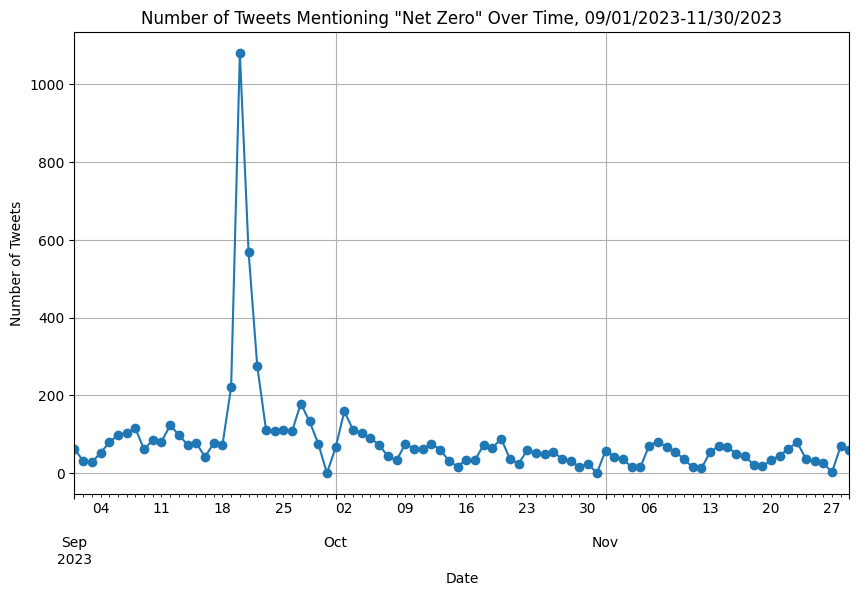

In [ ]:
# 2023
tweets_2023['date'] = pd.to_datetime(tweets_2023['date'])
filtered_tweets_2023 = tweets_2023[(tweets_2023['date'] >= '2023-09-01') & (tweets_2023['date'] <= '2023-11-30')]
tweet_counts_2023 = filtered_tweets_2023.groupby(pd.Grouper(key='date', freq='D')).size()

plt.figure(figsize=(10, 6))
tweet_counts_2023.plot(kind='line', marker='o', linestyle='-')
plt.title('Number of Tweets Mentioning "Net Zero" Over Time, 09/01/2023-11/30/2023')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

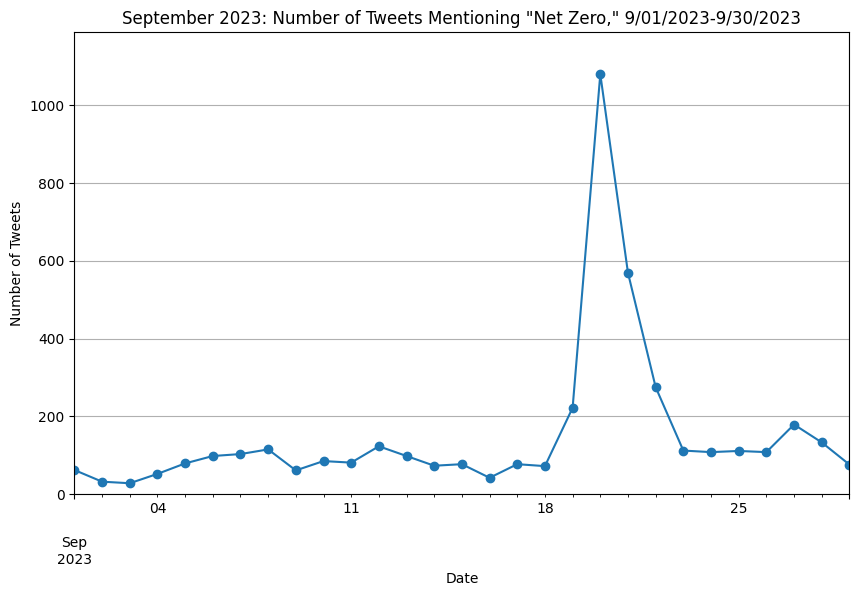

In [ ]:
# september 2023

filtered_tweets_2023 = tweets_2023[(tweets_2023['date'] >= '2023-09-01') & (tweets_2023['date'] <= '2023-09-30')]
tweet_counts_2023 = filtered_tweets_2023.groupby(pd.Grouper(key='date', freq='D')).size()

plt.figure(figsize=(10, 6))
tweet_counts_2023.plot(kind='line', marker='o', linestyle='-')

plt.ylim(0, tweet_counts_2023.max() * 1.1)

plt.title('September 2023: Number of Tweets Mentioning "Net Zero," 9/01/2023-9/30/2023')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

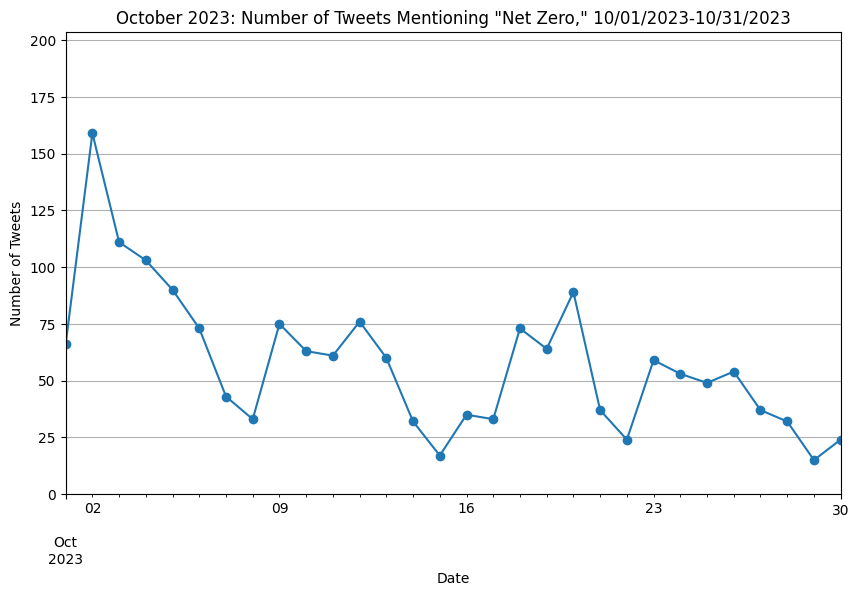

In [ ]:
# october 2023

filtered_tweets_2023 = tweets_2023[(tweets_2023['date'] >= '2023-10-01') & (tweets_2023['date'] <= '2023-10-31')]
tweet_counts_2023 = filtered_tweets_2023.groupby(pd.Grouper(key='date', freq='D')).size()

plt.figure(figsize=(10, 6))
tweet_counts_2023.plot(kind='line', marker='o', linestyle='-')

plt.ylim(0, tweet_counts_2023.max() * 1.28)

plt.title('October 2023: Number of Tweets Mentioning "Net Zero," 10/01/2023-10/31/2023')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

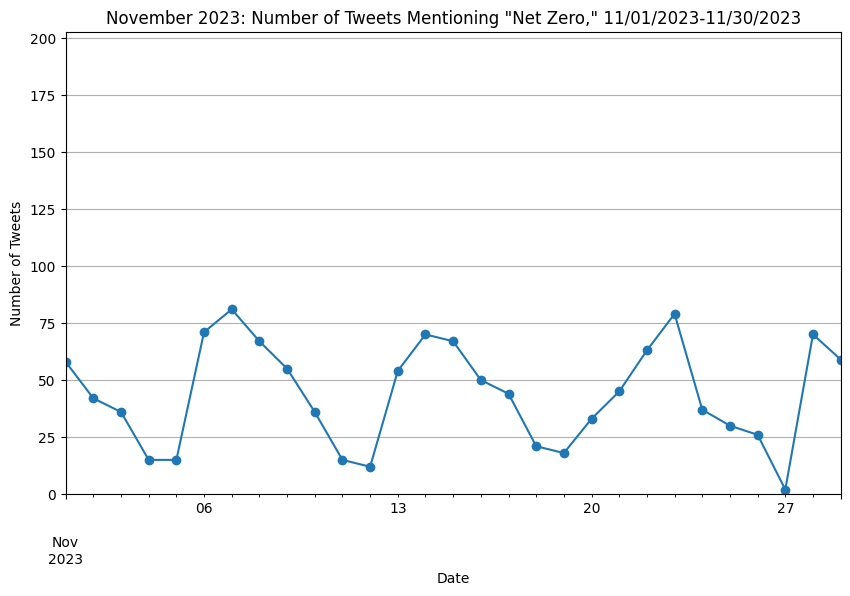

In [ ]:
# november 2023

filtered_tweets_2023 = tweets_2023[(tweets_2023['date'] >= '2023-11-01') & (tweets_2023['date'] <= '2023-11-30')]
tweet_counts_2023 = filtered_tweets_2023.groupby(pd.Grouper(key='date', freq='D')).size()

plt.figure(figsize=(10, 6))
tweet_counts_2023.plot(kind='line', marker='o', linestyle='-')

plt.ylim(0, tweet_counts_2023.max() * 2.5)

plt.title('November 2023: Number of Tweets Mentioning "Net Zero," 11/01/2023-11/30/2023')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()